In [2]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict, train_test_split
import pandas as pd
import seaborn as sns

In [3]:
iris_dataset  = datasets.load_iris()

In [ ]:
target_names = iris_dataset ["target_names"]
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [24]:
iris_dataset.target[1:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
iris_dataset.target[[1,51,101]]

array([0, 1, 2])

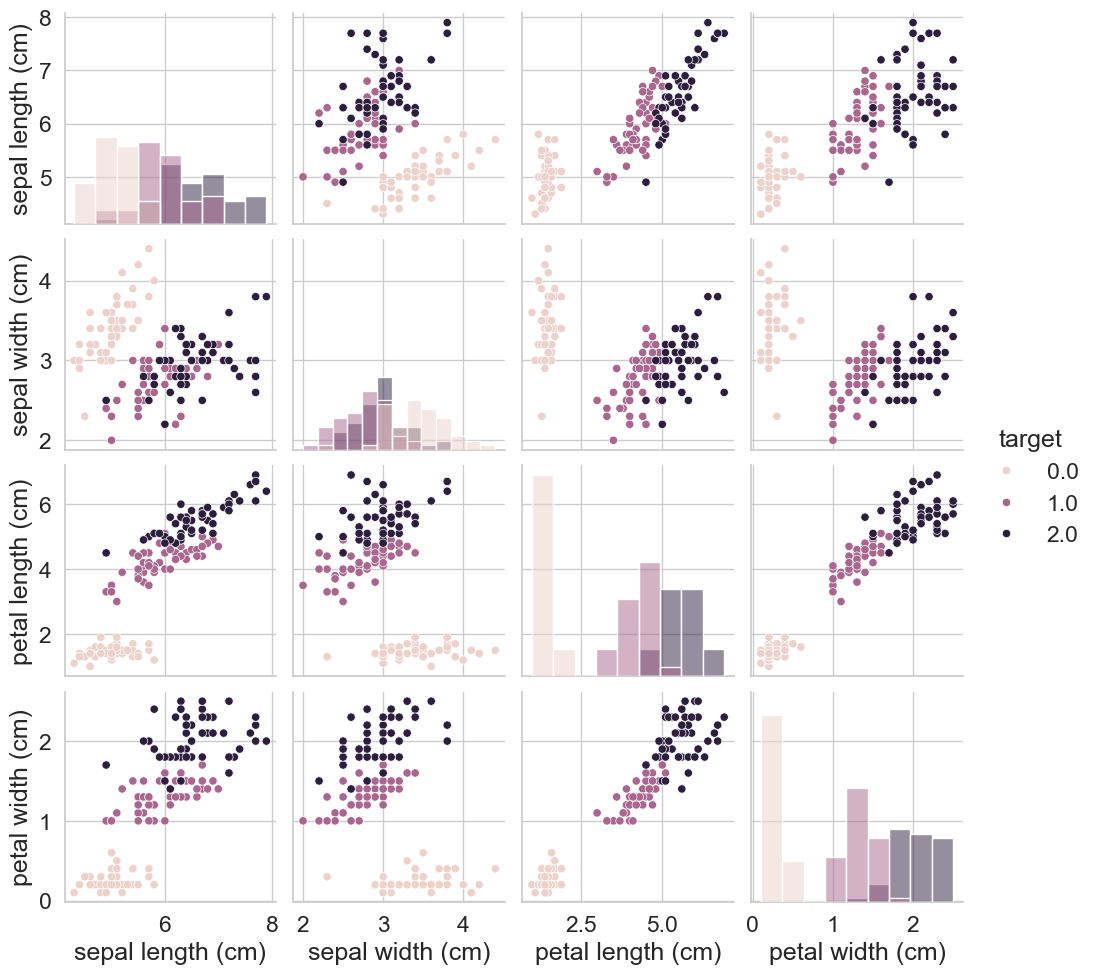

In [ ]:
data1 = pd.DataFrame(data= np.c_[iris_dataset ['data'], iris_dataset ['target']],
                     columns= iris_dataset ['feature_names'] + ['target'])
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data1, hue='target',diag_kind="hist"); 
plt.show()

In [ ]:
x = iris_dataset["data"]
y = iris_dataset["target"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [ ]:
virginica = 2
y_train_0 = (y_train==virginica)
y_test_0 = (y_test==virginica)

In [ ]:
sgd_clf = SGDClassifier()
sgd_clf.fit(x_train,y_train_0)

SGDClassifier()

In [ ]:
y_train_pred = cross_val_predict(sgd_clf,x_train,y_train_0,cv=3)

In [ ]:
cm=confusion_matrix(y_train_0,y_train_pred)
cm

array([[76,  4],
       [ 6, 34]])

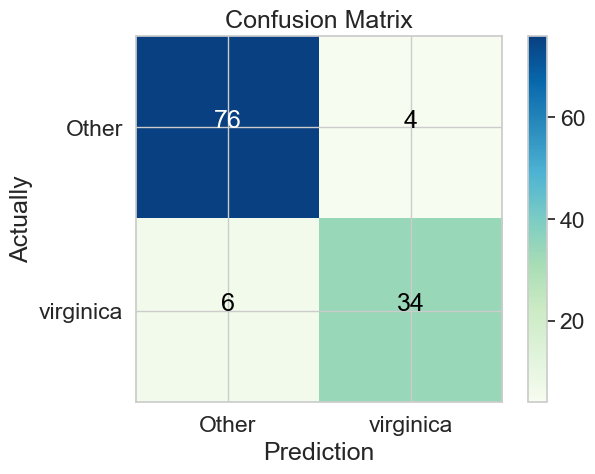

In [ ]:
cmap=plt.cm.GnBu
classes=["Other","virginica"]
plt.imshow(cm,interpolation='nearest',cmap=cmap)
plt.title("Confusion Matrix")
plt.colorbar()
trick_marks=np.arange(len(classes))
plt.xticks(trick_marks,classes)
plt.yticks(trick_marks,classes)
thresh=cm.max()/2
for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],'d'),
    horizontalalignment='center',
    color='white' if cm[i,j]>thresh else 'black')

plt.tight_layout()
plt.ylabel('Actually')
plt.xlabel('Prediction')
plt.show()

In [ ]:
y_test_pred=sgd_clf.predict(x_test)

In [ ]:
print(classification_report(y_test_0,y_test_pred,target_names=classes))
print("Accuracy Score = ",accuracy_score(y_test_0,y_test_pred)*100)

              precision    recall  f1-score   support

       Other       0.91      1.00      0.95        20
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.95      0.90      0.92        30
weighted avg       0.94      0.93      0.93        30

Accuracy Score =  93.33333333333333
